In [2]:
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
simplefilter(action='ignore', category=FutureWarning)

In [11]:
filename = 'processed.cleveland.csv'

In [14]:
df = pd.read_csv(filename, header=None)

In [16]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
              'thal', 'target']

# cleaning the data

In [17]:
# 1) finding values with question mark "?" and replacing it with null value
new_df = df.replace('?', np.NaN)
# 2) finding null value, if more than 6 parameters are null delete the row
new_df = new_df.dropna(thresh=6)
# 3) if its null value, replacing it with 0
new_df = new_df.fillna(0)

In [18]:
new_df['target'] = new_df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# writing the cleaned data frame into excel

In [19]:
print("NEW DATA SET")
print(new_df)
new_df.to_csv("output.csv")

NEW DATA SET
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      

# data preproccessing

In [20]:
inputs = new_df.drop('target',axis='columns')

target = new_df['target']
print(target)

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


# GRAPH

# Variation of Age for each target class

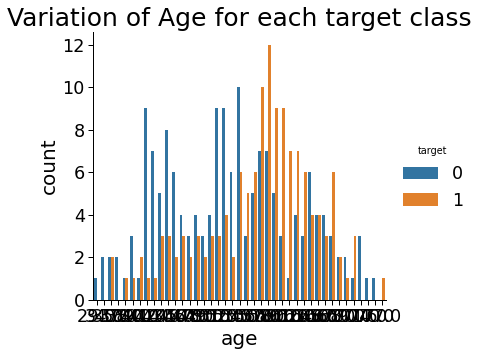

In [24]:
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})
sns.catplot(kind='count', data=new_df, x='age', hue='target', order=new_df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

# Distribution of age vs sex with the target class

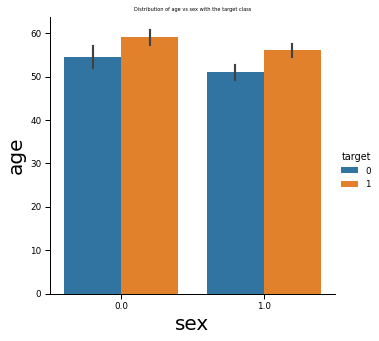

In [22]:
sns.catplot(kind='bar', data=new_df, y='age', x='sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

# Distribution of CHOLESTROL VS COUNT with the target class

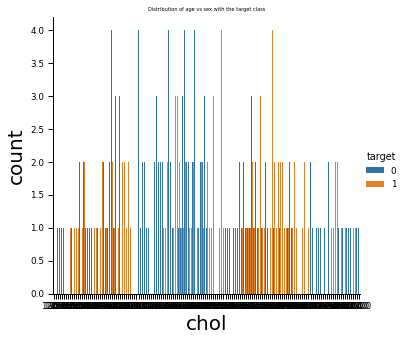

In [23]:
sns.set_context("paper", font_scale=1, rc={"font.size": 20, "axes.titlesize": 5, "axes.labelsize": 20})
sns.catplot(kind='count', data=new_df, x='chol', hue='target', order=new_df['chol'].sort_values().unique())
plt.title('Distribution of CHOLESTROL VS COUNT with the target class')
plt.show()

# LABEL ENCODER

In [25]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_cp = LabelEncoder()
le_trestbps = LabelEncoder()
le_chol = LabelEncoder()
le_fbs = LabelEncoder()
le_restecg = LabelEncoder()
le_thalach = LabelEncoder()
le_exang = LabelEncoder()
le_oldpeak = LabelEncoder()
le_slope = LabelEncoder()


In [26]:
inputs['le_age'] = le_age.fit_transform(inputs['age'])
inputs['le_sex'] = le_sex.fit_transform(inputs['sex'])
inputs['le_cp'] = le_cp.fit_transform(inputs['cp'])
inputs['le_trestbps'] = le_trestbps.fit_transform(inputs['trestbps'])
inputs['le_chol'] = le_chol.fit_transform(inputs['chol'])
inputs['le_fbs'] = le_fbs.fit_transform(inputs['fbs'])
inputs['le_restecg'] = le_restecg.fit_transform(inputs['restecg'])
inputs['le_thalach'] = le_thalach.fit_transform(inputs['thalach'])
inputs['le_exang'] = le_exang.fit_transform(inputs['exang'])
inputs['le_oldpeak'] = le_oldpeak.fit_transform(inputs['oldpeak'])
inputs['le_slope'] = le_slope.fit_transform(inputs['slope'])

print("inputs")
print(inputs)

inputsn = inputs.drop(['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope'],axis='columns')
print("inputs")
print(inputsn)

inputs
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     ...  le_sex le_cp le_trestbps  le_chol 

In [27]:
X = inputsn.iloc[:, :-1].values
y = target

# Train Test, Decision Tree ML agorithm

In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # test_size = 20%    #random_state to get same sample

print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("y_tarin")
print(y_train)
print("y_test")
print(y_test)
from sklearn import tree
model = tree.DecisionTreeClassifier()

print(".............................")
print("model_fit")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


X_train
[['3.0' '7.0' 29 ... 53 0 35]
 ['0.0' '3.0' 21 ... 18 1 31]
 ['2.0' '7.0' 22 ... 33 1 35]
 ...
 ['1.0' '7.0' 28 ... 5 0 12]
 ['1.0' '7.0' 21 ... 30 1 19]
 ['0.0' '3.0' 25 ... 25 0 0]]
X_test
[['2.0' '7.0' 14 1 3 22 85 1 2 49 1 0]
 ['1.0' '3.0' 7 0 1 5 30 0 0 67 0 0]
 ['0.0' '7.0' 36 1 3 31 12 0 0 25 1 25]
 ['1.0' '7.0' 27 1 3 14 89 0 0 39 1 33]
 ['1.0' '6.0' 23 1 3 34 104 0 2 13 1 6]
 ['0.0' '3.0' 21 1 1 22 91 0 0 54 0 0]
 ['0.0' '7.0' 30 0 2 28 130 0 0 33 0 2]
 ['0.0' '3.0' 11 0 1 9 5 0 0 37 0 0]
 ['0.0' '3.0' 11 1 3 11 89 0 2 82 0 0]
 ['0.0' '3.0' 7 1 2 22 45 0 2 67 0 19]
 ['2.0' '7.0' 33 1 3 18 83 1 0 62 0 2]
 ['1.0' '7.0' 29 1 3 22 83 0 2 46 0 14]
 ['0.0' '3.0' 7 1 2 9 80 0 0 77 0 0]
 ['1.0' '7.0' 21 1 3 40 113 0 2 44 1 8]
 ['0.0' '7.0' 19 1 3 28 34 1 2 54 1 29]
 ['0.0' '3.0' 18 0 2 26 28 0 2 68 0 1]
 ['0.0' '3.0' 14 1 3 15 53 0 2 83 0 0]
 ['0.0' '6.0' 18 1 0 13 22 0 2 86 0 0]
 ['0.0' '3.0' 11 0 1 22 65 0 2 74 0 6]
 ['3.0' '3.0' 36 1 3 22 135 0 2 11 0 23]
 ['2.0' '3.0' 37 0

# Prediction

In [30]:
print("chance of having heart attack for the patient")

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Decision Tree = {}'.format(100 * (cm_train[0][0] + cm_train[1][1]) / len(y_train)))

print('Accuracy for test set for Decision Tree = {}'.format(100 * (cm_test[0][0] + cm_test[1][1]) / len(y_test)))

chance of having heart attack for the patient

Accuracy for training set for Decision Tree = 100.0
Accuracy for test set for Decision Tree = 62.295081967213115
